In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fol_dir = "/content/drive/MyDrive/mah_ws/ai_prj/3D_Tumor/private/stat"
list_file = [item for item in os.listdir(fol_dir) if (".xlsx" in item)]
list_file


['df_data.xlsx',
 'FLAIR_image_stat.xlsx',
 'T1w_image_stat.xlsx',
 't1gd_image_stat.xlsx',
 'T2w_image_stat.xlsx',
 'FLAIR_label_stat.xlsx',
 'T1w_label_stat.xlsx',
 't1gd_label_stat.xlsx',
 'T2w_label_stat.xlsx']

In [3]:
for val in list_file:
  name = val.split(".xlsx")[0]
  globals()[f"{name}"] = pd.read_excel(f"{fol_dir}/{val}")

## EDA: Sample Image FLAIR

In [4]:
FLAIR_image_stat.head()

,image,label,phase,Shape,Width,Height,Depth,Origin,OriginX,OriginY,...,xmax,ymin,ymax,zmin,zmax,ScalarMedian,ScalarUpperQuartile,ScalarLowerQuartile,ScalarUpperWhisker,ScalarLowerWhisker
0,./imagesTr/BRATS_457.nii.gz,./labelsTr/BRATS_457.nii.gz,train,"(155, 240, 240)",240,240,155,"(0.0, 0.0, 0.0)",0,0,...,0,-240,0,0,155,0,0,0,0,0
1,./imagesTr/BRATS_306.nii.gz,./labelsTr/BRATS_306.nii.gz,train,"(155, 240, 240)",240,240,155,"(0.0, 0.0, 0.0)",0,0,...,0,-240,0,0,155,0,0,0,0,0
2,./imagesTr/BRATS_206.nii.gz,./labelsTr/BRATS_206.nii.gz,train,"(155, 240, 240)",240,240,155,"(0.0, 0.0, 0.0)",0,0,...,0,-240,0,0,155,0,0,0,0,0
3,./imagesTr/BRATS_449.nii.gz,./labelsTr/BRATS_449.nii.gz,train,"(155, 240, 240)",240,240,155,"(0.0, 0.0, 0.0)",0,0,...,0,-240,0,0,155,0,0,0,0,0
4,./imagesTr/BRATS_318.nii.gz,./labelsTr/BRATS_318.nii.gz,train,"(155, 240, 240)",240,240,155,"(0.0, 0.0, 0.0)",0,0,...,0,-240,0,0,155,0,0,0,0,0


In [6]:
print(f"Dataframe shape {FLAIR_image_stat.shape}")

Dataframe shape (750, 34)


In [7]:
 FLAIR_image_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   image                       750 non-null    object 
 1   label                       484 non-null    object 
 2   phase                       750 non-null    object 
 3   Shape                       750 non-null    object 
 4   Width                       750 non-null    int64  
 5   Height                      750 non-null    int64  
 6   Depth                       750 non-null    int64  
 7   Origin                      750 non-null    object 
 8   OriginX                     750 non-null    int64  
 9   OriginY                     750 non-null    int64  
 10  OriginZ                     750 non-null    int64  
 11  Spacing                     750 non-null    object 
 12  WidthSpacing                750 non-null    int64  
 13  HeightSpacing               750 non

## Check Input Shape

In [48]:
print(pd.unique(FLAIR_image_stat.Shape))
print(pd.unique(T1w_image_stat.Shape))
print(pd.unique(t1gd_image_stat.Shape))
print(pd.unique(T2w_image_stat.Shape))

['(155, 240, 240)']
['(155, 240, 240)']
['(155, 240, 240)']
['(155, 240, 240)']


**All input modal shape in same size**

In [63]:
image_features = ["Spacing","WidthSpacing","HeightSpacing","SliceThickness","Direction","NumberOfPixels","NumberOfComponentsPerPixel"]
for item in image_features:
  print(item)
  print("FLAIR: ", pd.unique(FLAIR_image_stat[item]))
  print("T1w: ", pd.unique(T1w_image_stat[item]))
  print("t1gd: ", pd.unique(t1gd_image_stat[item]))
  print("T2w: ", pd.unique(T2w_image_stat[item]))
  print("--"*50, "\n")



Spacing
FLAIR:  ['(1.0, 1.0, 1.0)']
T1w:  ['(1.0, 1.0, 1.0)']
t1gd:  ['(1.0, 1.0, 1.0)']
T2w:  ['(1.0, 1.0, 1.0)']
---------------------------------------------------------------------------------------------------- 

WidthSpacing
FLAIR:  [1]
T1w:  [1]
t1gd:  [1]
T2w:  [1]
---------------------------------------------------------------------------------------------------- 

HeightSpacing
FLAIR:  [1]
T1w:  [1]
t1gd:  [1]
T2w:  [1]
---------------------------------------------------------------------------------------------------- 

SliceThickness
FLAIR:  [1]
T1w:  [1]
t1gd:  [1]
T2w:  [1]
---------------------------------------------------------------------------------------------------- 

Direction
FLAIR:  ['(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)']
T1w:  ['(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)']
t1gd:  ['(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)']
T2w:  ['(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)']
---------------------------------------------------------

## Check input features of pixel

**All modal type was have ScalarMin is 0**

FLAIR


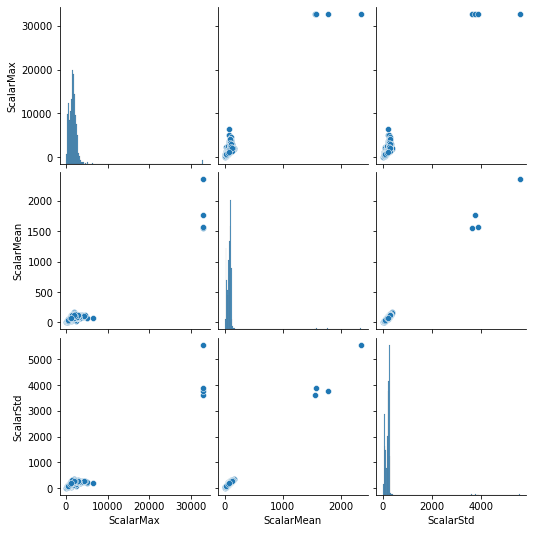

T1w


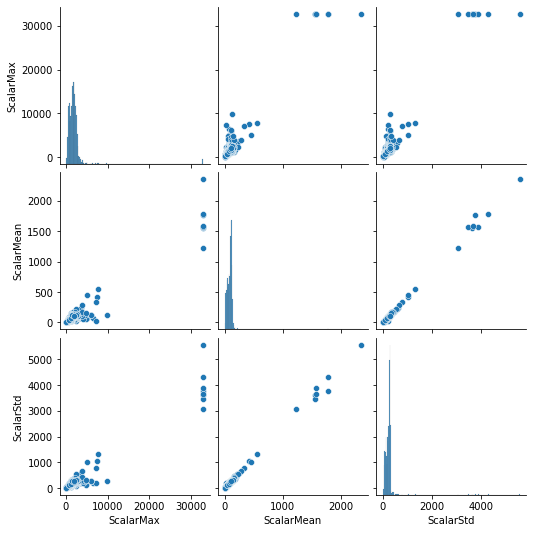

T2w


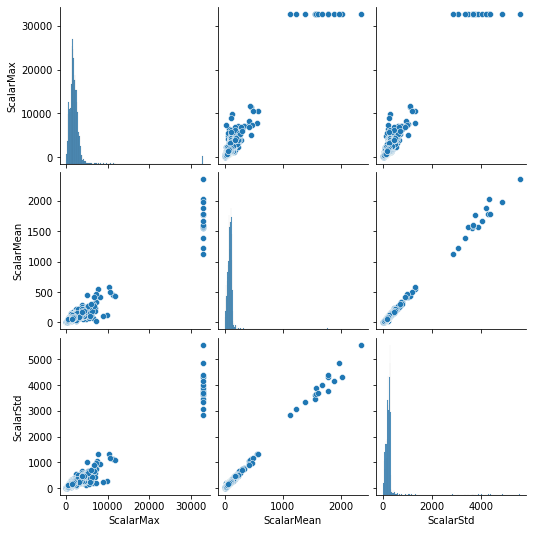

t1gd


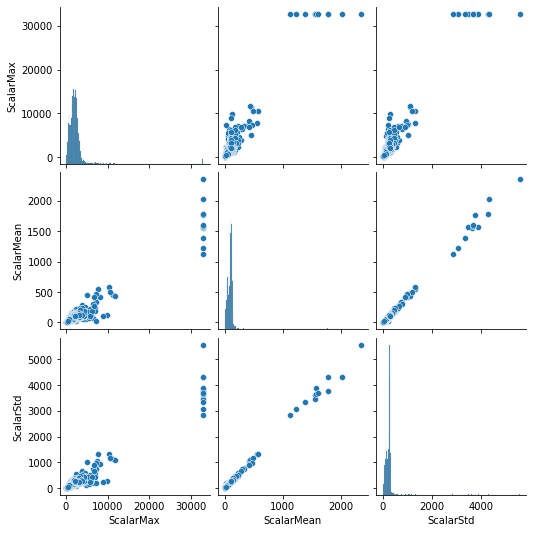

In [75]:
pixel_features = ['ScalarMax','ScalarMean','ScalarStd']
for item in ["FLAIR", "T1w", "T2w", "t1gd"]:
  print(item)
  sns.pairplot(globals()[f"{item}_image_stat"][pixel_features])
  plt.show()



```
We have some image was outliers here.
```



In [101]:
pixel_features = ['ScalarMax','ScalarMean','ScalarStd']
modals = ["FLAIR", "T1w", "T2w", "t1gd"]

FLAIR
Number row dropped: 24


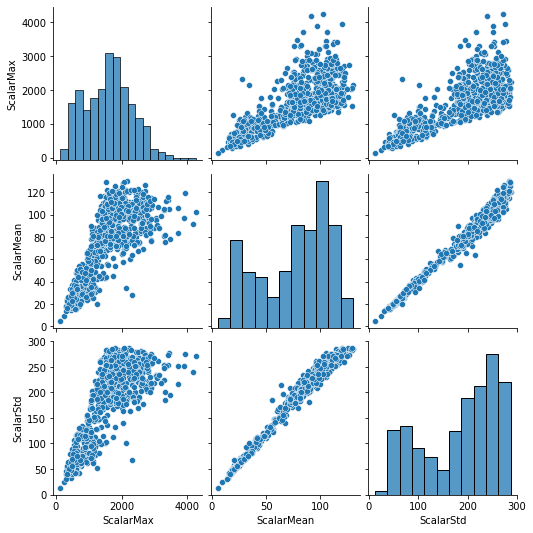

T1w
Number row dropped: 45


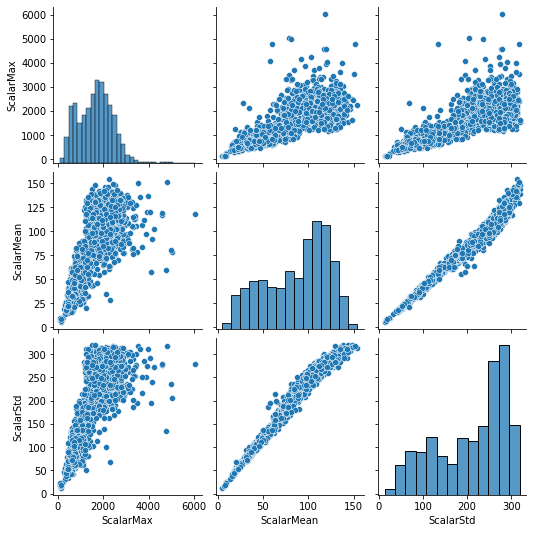

T2w
Number row dropped: 90


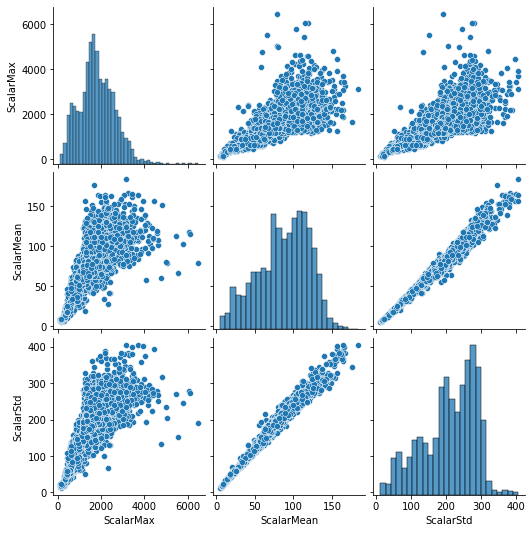

t1gd
Number row dropped: 69


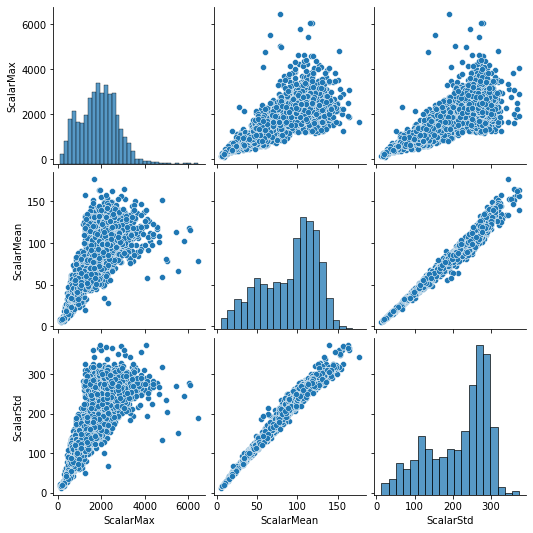

In [117]:
for modal in modals: 
  temp = globals()[f"{modal}_image_stat"].copy()
  for item in pixel_features:
    outline = temp[item].quantile([0.1,0.99])[0.99]
    temp.drop(temp[temp[item] > outline].index, inplace=True)
  drop = globals()[f"{modal}_image_stat"].shape[0] - temp.shape[0]
  print(f"{modal}")
  print(f"Number row dropped: {drop}")
  sns.pairplot(temp[pixel_features])
  plt.show()


In [121]:
px_f = ["ScalarMedian","ScalarUpperQuartile","ScalarLowerQuartile","ScalarUpperWhisker","ScalarLowerWhisker"]

In [122]:
for item in px_f:
  print(item)
  print("FLAIR: ", pd.unique(FLAIR_image_stat[item]))
  print("T1w: ", pd.unique(T1w_image_stat[item]))
  print("t1gd: ", pd.unique(t1gd_image_stat[item]))
  print("T2w: ", pd.unique(T2w_image_stat[item]))
  print("--"*50, "\n")


ScalarMedian
FLAIR:  [0]
T1w:  [0]
t1gd:  [0]
T2w:  [0]
---------------------------------------------------------------------------------------------------- 

ScalarUpperQuartile
FLAIR:  [0]
T1w:  [0]
t1gd:  [0]
T2w:  [0]
---------------------------------------------------------------------------------------------------- 

ScalarLowerQuartile
FLAIR:  [0]
T1w:  [0]
t1gd:  [0]
T2w:  [0]
---------------------------------------------------------------------------------------------------- 

ScalarUpperWhisker
FLAIR:  [0]
T1w:  [0]
t1gd:  [0]
T2w:  [0]
---------------------------------------------------------------------------------------------------- 

ScalarLowerWhisker
FLAIR:  [0]
T1w:  [0]
t1gd:  [0]
T2w:  [0]
---------------------------------------------------------------------------------------------------- 

